<a href="https://colab.research.google.com/github/pinei/ciencia-dados-python/blob/main/imersao-dados/2_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Amostra de dados do ENEM (dados originais disponiveis em http://portal.inep.gov.br/microdados)
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados_df = pd.read_csv(fonte)  # type: <class 'pandas.core.frame.DataFrame'>

Verificando a distribuição de inscritos com 14 anos ou menos por Estado (embora a amostra seja pequena para uma conclusão)

In [4]:
# Dados dos inscritos de 14 anos ou menos
idade_under_14_df = dados_df.query("NU_IDADE <= 14")
idade_under_14_count_series = idade_under_14_df["SG_UF_RESIDENCIA"].value_counts(normalize=True)
idade_under_14_count_series

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
MT    0.027586
DF    0.027586
AM    0.027586
SE    0.020690
PR    0.020690
TO    0.020690
RO    0.013793
SC    0.013793
AL    0.013793
RJ    0.006897
AP    0.006897
ES    0.006897
RN    0.006897
MS    0.006897
RS    0.006897
AC    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

Comparando os dados por Gráfico de Pizza e Gráfico de Barra (o segundo é visivelmente mais apropriado)

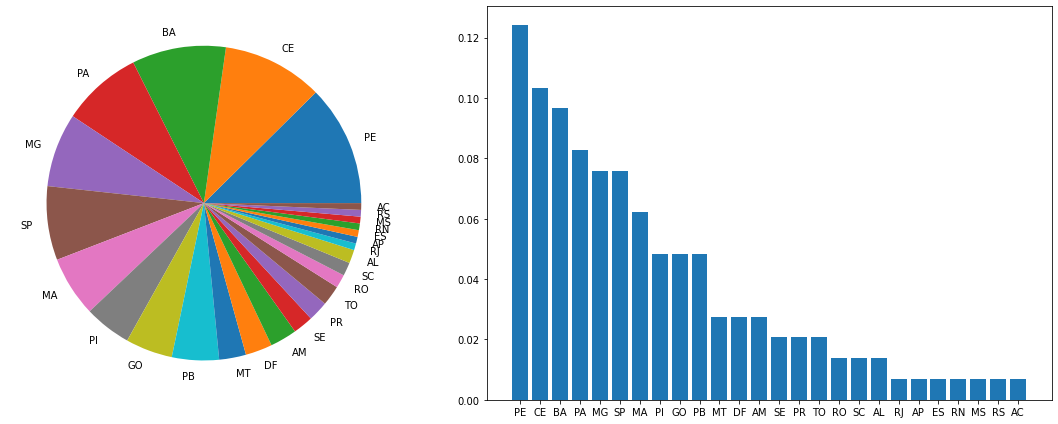

In [5]:
plt.figure(figsize=(16, 6))

plt.subplot(121) # rows, cols, index
plt.pie(idade_under_14_count_series.values, labels=idade_under_14_count_series.index)

plt.subplot(122)
plt.bar(idade_under_14_count_series.index, idade_under_14_count_series.values)
plt.tight_layout() # ajuste automático

Definindo uma função para facilitar o uso do gráfico Boxplot

In [14]:
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.

# Função customizada para uso do boxplot a partir de 2 variáveis, ordenando o eixo x
def _boxplot(data, x, y, title, hue=None):
  # Valores ordenados da coluna x
  order = data[x].unique() # type: numpy.ndarray
  order.sort()

  # Boxplot com outliers na faixa de 1.5% da amostra
  # Documentação indica que 1.5 já seria o valor padrão para a configuração dos whiskers (optei por manter explicito)
  sns.boxplot(data = data, x=x, y=y, order=order, whis = 1.5, hue=hue)
  plt.title(title)

### Classificação de Renda do ENEM

|Código|Renda (R$)|
|------|-----|
|A|Nenhuma renda|
|B|até 998,00|
|C|até 1.497,00|
|D|até 1.996,00|
|E|até 2.495,00|
|F|até 2.994,00|
|G|até 3.992,00|
|H|até 4.990,00|
|I|até 5.988,00|
|J|até 6.986,00|
|K|até 7.984,00|
|L|até 8.982,00|
|M|até 9.980,00|
|N|até 11.976,00|
|O|até 14.970,00|
|P|até 19.960,00|
|Q|mais de 19.960,00|

Comparando as distribuições das Notas de Matemática sobre a Renda Familiar declarada.

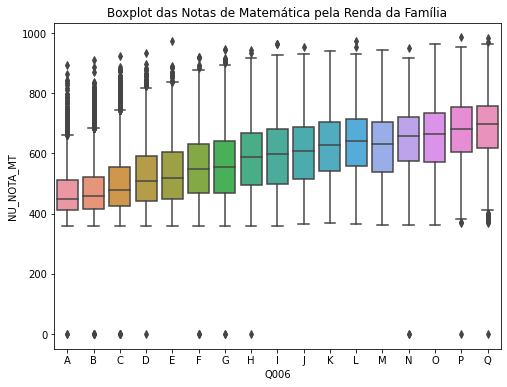

In [8]:
# Renda Mensal da Família x Nota de Matemática
plt.figure(figsize=(8,6))
_boxplot(dados_df, x="Q006", y="NU_NOTA_MT", title="Boxplot das Notas de Matemática pela Renda da Família")

Analisando agora a Nota Total (Soma das Notas)


Text(0.5, 1.0, 'Distribuição da Nota Total')

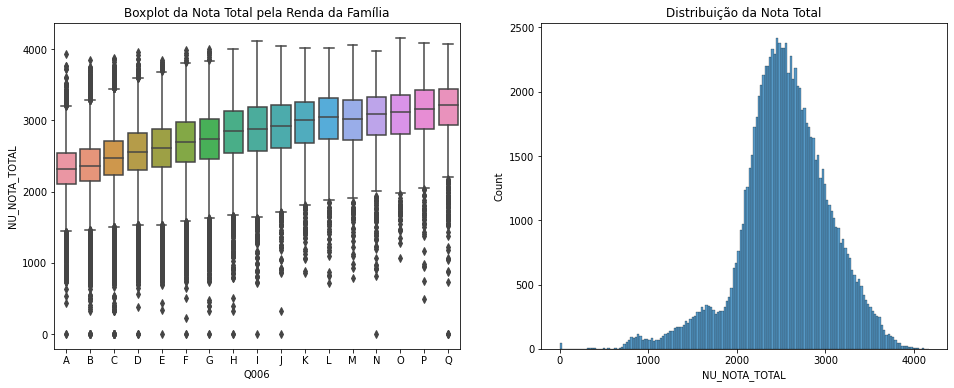

In [9]:
# Ciências da Natureza, Ciências Humanas, Matemática, Linguagens e Codigos, Redação
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

# Soma das Notas é dada pela Soma Horizontal das variáveis que representam as Notas (axis=1)
# Precisa de uma Nota válida para ser considerada, se tornando NaN se todas a Notas foram NaN (min_count=1)
dados_df["NU_NOTA_TOTAL"] = dados_df[provas].sum(axis=1, min_count=1) # type: pandas.core.series.Series

plt.figure(figsize=(16, 6))

# Gráfico de distribuição por Renda da Família (se NU_NOTA_TOTAL == NaN não é considerado pelo gráfico)
plt.subplot(121)
_boxplot(dados_df, "Q006", "NU_NOTA_TOTAL", "Boxplot da Nota Total pela Renda da Família")

# Distribuição das Notas Totais
plt.subplot(122)
sns.histplot(dados_df, x="NU_NOTA_TOTAL")
plt.title("Distribuição da Nota Total")

Verificando a distribuição das Notas Totais nulas (por motivo de Eliminação ou Ausência em todas as provas) sobre a Renda Familiar declarada, comparando com a distribuição de inscritos (não mostra diferença relevante na distribuição)

Text(0.5, 1.0, 'Inscrições por Renda Familiar')

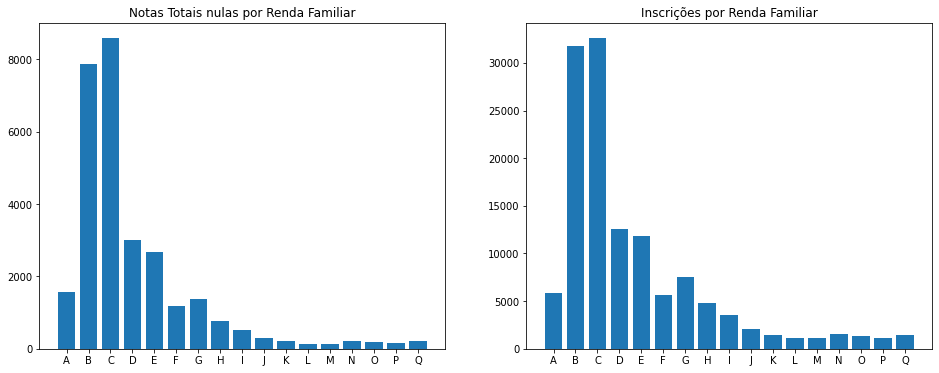

In [13]:
nota_total_null = dados_df["NU_NOTA_TOTAL"].isnull()

plt.figure(figsize=(16, 6))

plt.subplot(121)
notas_totais_nulas_renda_series = dados_df[nota_total_null]["Q006"].value_counts().sort_index()
plt.bar(notas_totais_nulas_renda_series.index, notas_totais_nulas_renda_series.values)
plt.title("Notas Totais nulas por Renda Familiar")

plt.subplot(122)
dados_renda = dados_df["Q006"].value_counts().sort_index()
plt.bar(dados_renda.index, dados_renda.values)
plt.title("Inscrições por Renda Familiar")


Comparando a Distribuição de Notas Totais de Treineiros e Não Treineiros sobre a Renda Familiar

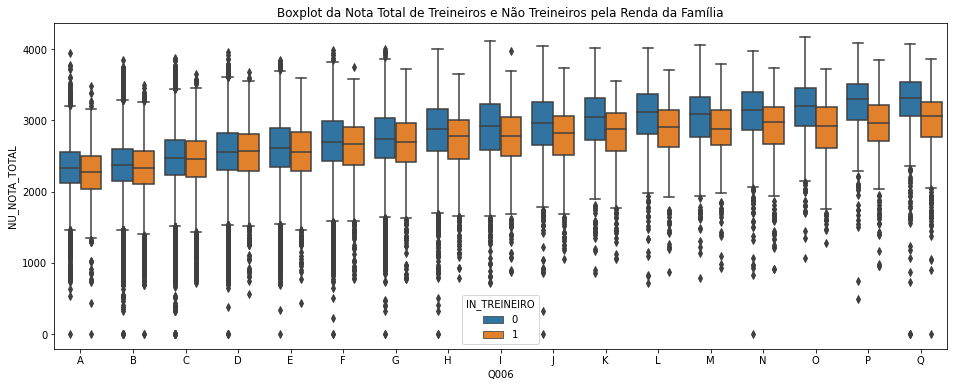

In [15]:
plt.figure(figsize=(16, 6))
_boxplot(dados_df, "Q006", "NU_NOTA_TOTAL", "Boxplot da Nota Total de Treineiros e Não Treineiros pela Renda da Família", hue = "IN_TREINEIRO")

Comparando a proporção entre Treineiros e Não Treineiros sobre a Renda Familiar


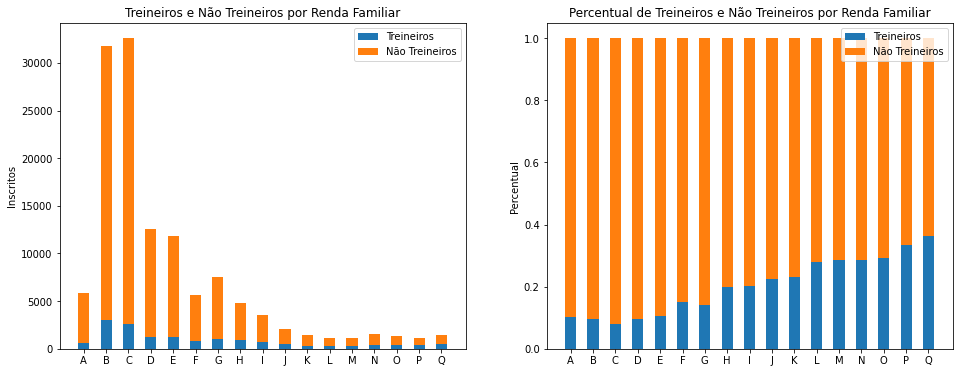

In [30]:
treineiros_renda_series = dados_df[dados_df.IN_TREINEIRO == 1]["Q006"].value_counts().sort_index()
nao_treineiros_renda_series = dados_df[dados_df.IN_TREINEIRO == 0]["Q006"].value_counts().sort_index()
total_renda_series = treineiros_renda_series + nao_treineiros_renda_series

perc_treineiros_renda_series = treineiros_renda_series / total_renda_series
perc_nao_treineiros_renda_series = nao_treineiros_renda_series / total_renda_series

plt.figure(figsize=(16, 6))
plt.subplot(121)
p1 = plt.bar(total_renda_series.index, treineiros_renda_series, 0.50)
p2 = plt.bar(total_renda_series.index, nao_treineiros_renda_series, 0.50,
             bottom=treineiros_renda_series)

plt.ylabel('Inscritos')
plt.title('Treineiros e Não Treineiros por Renda Familiar')
plt.legend((p1[0], p2[0]), ('Treineiros', 'Não Treineiros'))

plt.subplot(122)
p1 = plt.bar(total_renda_series.index, perc_treineiros_renda_series, 0.50)
p2 = plt.bar(total_renda_series.index, perc_nao_treineiros_renda_series, 0.50,
             bottom=perc_treineiros_renda_series)

plt.ylabel('Percentual')
plt.title('Percentual de Treineiros e Não Treineiros por Renda Familiar')
plt.legend((p1[0], p2[0]), ('Treineiros', 'Não Treineiros'))

plt.show()

Comparando a Distribuição de Notas Totais dos que tem ou não tem Acesso a Internet sobre a Renda Familiar

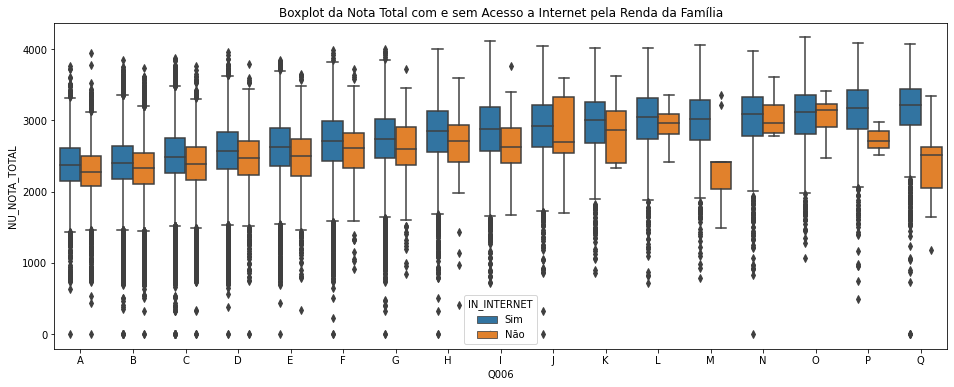

In [41]:
dados_df["IN_INTERNET"] = dados_df.apply(lambda row: "Sim" if (row["Q025"] == "B") else "Não", axis=1)

plt.figure(figsize=(16, 6))
_boxplot(dados_df, "Q006", "NU_NOTA_TOTAL", "Boxplot da Nota Total com e sem Acesso a Internet pela Renda da Família", hue = "IN_INTERNET")